# Sensitivity analysis

In [4]:
from SALib.sample import saltelli, fast_sampler
from SALib.sample import ff as ffs
from SALib.analyze import sobol, fast, ff
from SALib.plotting.bar import plot as barplot
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility'],
    'bounds': [[0, 0.75],
               [0, 0.50],
               [0, 0.30]]
}

# Sobol

In [46]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**12)
    t = pd.DataFrame(param_values)
    t.columns = ["random-mating", "leakage", "fertility"]
    t.to_csv("../models/fertility-BMI/data/param-sobol.csv", index=False)
else:
    t = pd.read_csv("../models/fertility-BMI/data/param-sobol.csv")
len(t)

32768

In [47]:
df = pd.read_csv("../output/data/results-sobol.csv", sep = ";")
params = pd.read_csv("../output/data/param-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]
Y = df["g4"].to_numpy()
len(Y)

32768

In [48]:
Si = sobol.analyze(problem, Y, print_to_console=True)

                     ST   ST_conf
random-mating  0.237528  0.025472
leakage        0.799776  0.046905
fertility      0.403679  0.045133
                     S1   S1_conf
random-mating -0.004316  0.023461
leakage        0.479999  0.058099
fertility      0.187856  0.025201
                                  S2   S2_conf
(random-mating, leakage)    0.093152  0.050321
(random-mating, fertility)  0.013813  0.036809
(leakage, fertility)        0.095374  0.078421


In [49]:
total, first, second = Si.to_df()

'../manuscript/plots/sobol-s2.pdf'

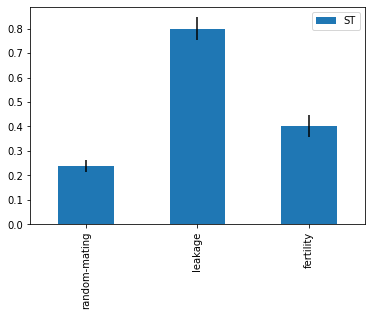

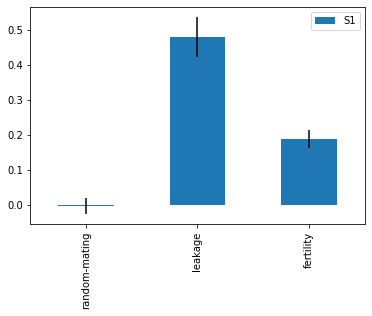

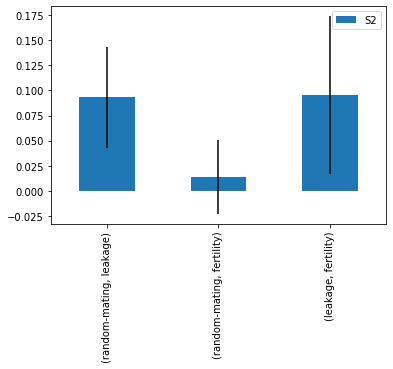

In [50]:
st = barplot(total)
plt.savefig("../output/plots/sobol-st.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig("../output/plots/sobol-s1.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig("../output/plots/sobol-s2.pdf", bbox_inches='tight')

shutil.copy("../output/plots/sobol-st.pdf", "../manuscript/plots/")
shutil.copy("../output/plots/sobol-s1.pdf", "../manuscript/plots/")
shutil.copy("../output/plots/sobol-s2.pdf", "../manuscript/plots/")

In [51]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='leakage',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.4),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility',
                    zaxis_title='leakage'),
                    width=700,
                    margin=dict(r=10, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [3]:
# fig.write_image("../output/plots/3D-scatter-sobol.pdf")
shutil.copy("../output/plots/3D-scatter-sobol.png", "../manuscript/plots/")

'../manuscript/plots/3D-scatter-sobol.png'

# EFast

In [6]:

sample_parameters = False

if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ["random-mating", "leakage", "fertility"]
    t.to_csv("../models/fertility-BMI/data/param-efast.csv", index=False)
else:
    t = pd.read_csv("../models/fertility-BMI/data/param-efast.csv")
t.shape

(6000, 3)

In [8]:
df = pd.read_csv("../output/data/results-efast.csv", sep = ";")
params = pd.read_csv("../output/data/param-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]
Y = df["g4"].to_numpy()
len(Y)

6000

In [9]:
df.g4.describe()

count    6000.000000
mean        0.306637
std         0.121008
min         0.000000
25%         0.233136
50%         0.279166
75%         0.345253
max         0.997839
Name: g4, dtype: float64

In [10]:
Sif = fast.analyze(problem, Y, print_to_console=True)

                     S1        ST   S1_conf   ST_conf
random-mating  0.000970  0.211210  0.003809  0.020259
leakage        0.487970  0.784084  0.003329  0.018957
fertility      0.192268  0.470262  0.003887  0.018919


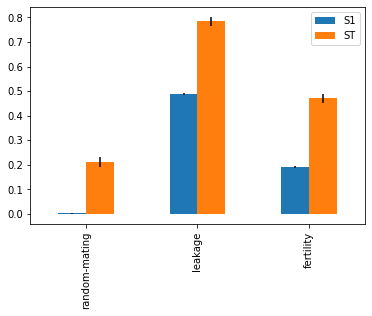

In [11]:
Sif.plot()
plt.savefig("../output/plots/efast.pdf", bbox_inches='tight')

In [12]:
shutil.copy("../output/plots/efast.pdf", "../manuscript/plots/")

'../manuscript/plots/efast.pdf'

In [13]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='leakage',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility',
                    zaxis_title='leakage'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [14]:
#fig.write_image("../output/plots/3D-scatter-efast.pdf")
shutil.copy("../output/plots/3D-scatter-efast.png", "../manuscript/plots/")

'../manuscript/plots/3D-scatter-efast.png'